In [369]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Question 1.

In [358]:
#Misclassification Function
def misclass(dataY):
  p=0
  for i in range(dataY.shape[0]):
    if dataY[i]==1:
      p=p+1
  if dataY.shape[0]==0:
    return 0
  p = p/(dataY.shape[0])
  return min(p,1-p)

In [359]:

def makeTree(dataX, dataY, maxlayer):
  X1min = min(dataX[:,0])
  X2min = min(dataX[:,1])
  X1max = max(dataX[:,0])
  X2max = max(dataX[:,1])
  
  m = Tree(dataX, dataY, maxlayer, 0, X1min, X1max, X2min, X2max)
  plt.show()
  return m

In [360]:

def Tree(dataX, dataY, maxlayer, layer, X1min, X1max, X2min, X2max):
  mep = misclass(dataY)
  total = dataY.shape[0]
  #Base Conditions
  if layer>maxlayer:
    error[0] = error[0] + mep*total
    return
  elif dataY.shape[0] <=10:
    error[0] = error[0] + mep*total
    return
  elif misclass(dataY)==0:
    return

 
  #Calculating the Maximum Gain over the Misclassification Loss
  gainx = -1e8
  gainy = -1e8
  cx = X1min+0.1
  cy = X2min+0.1
  ocx = 0
  ocy = 0
  count1=0
  count2=0
  p1=0
  p2=0
  while cx<X1max:
    
    for i in range(dataX.shape[0]):
      if (dataX[i,0]<cx):
        count1+=1
        if (dataY[i]==1):
          p1=p1+1
      else:
        count2+=1
        if (dataY[i]==1):
          p2+=1

    
    me1 = min((p1, count1-p1))
    me2 = min((p2, count2-p2))

    gain = mep - (me1/total+me2/total)

    if gain > gainx:
      gainx = gain
      ocx = cx
    count1 = 0
    count2 = 0
    p1 = 0
    p2 = 0
      
    cx = cx+0.01

  gain = 0
  while cy<X2max:

    for i in range(dataX.shape[0]):
      if (dataX[i,1]<cy):
        count1+=1
        if (dataY[i]==1):
          p1=p1+1
      else:
        count2+=1
        if (dataY[i]==1):
          p2+=1
      
   
    me1 = min((p1), count1-(p1))
    me2 = min((p2), count2-(p2))

    gain = mep - (me1/total+me2/total)
    
    if gain > gainy:
      gainy = gain
      ocy = cy
        
    count1 = 0
    count2 = 0
    p1 = 0
    p2 = 0
      
    cy = cy+0.01
    
  # Deciding whether to split about the x-axis or the y-axis
  x=0
  y=0
  if gainx>gainy:
    x=1
    
  else:
    y=1

  if max(gainx,gainy)<=0:
    return;

  #Plotting the New Classifier
  ptx = np.linspace(-X1min,X1max,1000)
  pty = np.linspace(-X2min,X2max,1000)
  pts = np.linspace(-5,5,1000)
  if x==1:
    plt.plot(ocx*np.ones(pts.shape[0]), pts)
  else:
    plt.plot(pts, ocy*np.ones(pts.shape[0]))
    
  #Splitting data for further Recursive calls
  dataX1 = []
  dataX2 = []
  dataY1 = []
  dataY2 = []
  for i in range(total):

    if x==1:
      if dataX[i,0]<ocx:
        dataX1.append([dataX[i,0],dataX[i,1]])
        dataY1.append(dataY[i])
      else:
        dataX2.append([dataX[i,0],dataX[i,1]])
        dataY2.append(dataY[i])
    else:
      if dataX[i,1]<ocy:
        dataX1.append([dataX[i,0], dataX[i,1]])
        dataY1.append(dataY[i])
      else:
        dataX2.append([dataX[i,0], dataX[i,1]])
        dataY2.append(dataY[i])

  dataX1 = np.array(dataX1)
  dataX2 = np.array(dataX2)
  dataY1 = np.array(dataY1)
  dataY2 = np.array(dataY2)

  #Recursive calls for child node
  if x==1:
    Tree(dataX1, dataY1, maxlayer, layer+1, X1min, ocx, X2min, X2max)
    Tree(dataX2, dataY2, maxlayer, layer+1, ocx, X1max, X2min, X2max)
  else:
    Tree(dataX1, dataY1, maxlayer, layer+1, X1min, X1max, X2min, ocy)
    Tree(dataX2, dataY2, maxlayer, layer+1, X1min, X1max, ocy, X2max)
  
  return
    

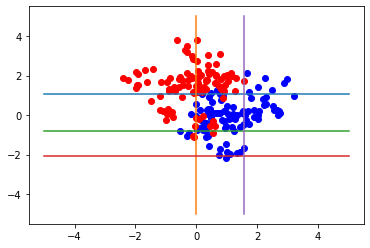

1.0


In [379]:
# 1(a)
a1 = np.array([1,0])
sd1 = np.array([[1,0],[0,1]])
m = np.random.multivariate_normal(a1, sd1, 10)

a2 = np.array([0,1])
sd2 = np.array([[1,0],[0,1]])
md = np.random.multivariate_normal(a2, sd2, 10)


a=0
sd=np.array([[0.1,0],[0,0.1]])
a=m[0]
p1=np.random.multivariate_normal(a,sd,10)
for i in range(9):
    a = m[i+1]
    p1 = np.concatenate((p1,np.random.multivariate_normal(a, sd, 10)), axis=0)
    
a = 0
sd = np.array([[0.1,0],[0,0.1]])
a = md[0]
n1= np.random.multivariate_normal(a,sd,10)
for i in range(9):
    a = md[i+1]
    n1 = np.concatenate((n1,np.random.multivariate_normal(a,sd, 10)), axis = 0)

# Plotting the formed dataset along with decision tree classifiers
plt.figure()
plt.plot(p1[0::, 0], p1[0::, 1], 'o', color = 'blue') #+1 dots are shown as blue dots
plt.plot(n1[0::, 0], n1[0::, 1],'o', color = 'red')   #-1 dots are shown as red dots

X = np.concatenate((p1,n1), axis=0)
Y = np.concatenate((np.ones(100), -1*np.ones(100)), axis=0)
error=[0]
makeTree(X,Y,3)
print(error[0]/Y.shape[0]*100)